## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Uploading dataset to start looking at
df = pd.DataFrame(pd.read_csv('ab_data.csv'))
# Look at the top of the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Know how many rows and columns dataset have:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# Identify how many users are unique users.
pd.Series.nunique(df['user_id'])

290584

d. The proportion of users converted.

In [5]:
# To know what is the prop of users converted, we have to count the
#  converted users which has a value of 1 and divied it by the total users.
df_converted = df[df['converted'] == 1]['converted'].count()
df_tot = df['converted'].count()
prop_converted = df_converted / df_tot
prop_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# To split the conditions of new_page & treatment don't match
# we will do 2 ways round
x = df[['group', 'landing_page']]
bad_data1 = df[(df['group'] != 'treatment') & (df['landing_page'] == 'new_page')]
bad_data2 = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')]
print("bad_data1 Numbers:", bad_data1['user_id'].count())
print("bad_data2 Numbers:", bad_data2['user_id'].count())
print("Total BadData rows are:", bad_data1['user_id'].count() + bad_data2['user_id'].count())

bad_data1 Numbers: 1928
bad_data2 Numbers: 1965
Total BadData rows are: 3893


f. Do any of the rows have missing values?

In [7]:
# to check N/A values it all appears with .info() statment
# as we see all rows has same count values number which does not include N/A.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  


a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# To clean our data we will remove the bad data which not needed to make
# our data more accurate, will get first the indexs in dataframe has bad_data
# Then drop it one after one.
indexs1 = df[(df['group'] != 'treatment') & (df['landing_page'] == 'new_page')].index
indexs2 = df[(df['group'] != 'control') & (df['landing_page'] == 'old_page')].index
df1 = df.drop(indexs1)
df2 = df1.drop(indexs2)
print("first data shape after dropping",df1.shape)
print("Final data shape for df2 = ",df2.shape)

first data shape after dropping (292550, 5)
Final data shape for df2 =  (290585, 5)


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# to know how many users after clean reamin:
print("Unique users are: ",pd.Series.nunique(df2['user_id']))

Unique users are:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# The repeated user is:
print("repeated user indexs are",df2[df2.duplicated(['user_id'], keep=False)]['user_id'].index)

repeated user indexs are Int64Index([1899, 2893], dtype='int64')


c. What is the row information for the repeat **user_id**? 

In [12]:
print("the rows of the repeated users are")
df2[df2.duplicated(['user_id'], keep=False)]

the rows of the repeated users are


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# it will remove the row with index 1899
df2 = df2.drop(1899)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# to get the probability we can get the average of who converted
# which is already with value 1, this can be done if values are 1 & 0
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# we can get the probability by average of 1 and 0 cross group column
# and converted column
control_prob = df2[df2['group'] == 'control']['converted'].mean()
print("The probability they converted group is = ",round(control_prob,4))

The probability they converted group is =  0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# we can get the probability by average of 1 and 0 cross group column
# and converted column
treatment_prob = df2[df2['group'] == 'treatment']['converted'].mean()
print("The probability they converted treatment is = ",round(treatment_prob,4))

The probability they converted treatment is =  0.1188


d. What is the probability that an individual received the new page?

In [17]:
# To know the prob of users who recieved new pages can get by the average
newpages = df2[df2['landing_page'] == 'new_page'].count()['group']
newpage_prob = newpages / df2['user_id'].count()
print("The probability they have newpage_prob is = ",round(newpage_prob,4))

The probability they have newpage_prob is =  0.5001


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2['converted'].mean()
print("P_new = ",p_new)

P_new =  0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2['converted'].mean()
print("P_old = ",p_old)

P_old =  0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2[df2['group'] == 'treatment'].count()['user_id']
print("n_new = ",n_new)

n_new =  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2[df2['group'] == 'control'].count()['user_id']
print("n_old = ",n_old)

n_old =  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_convr = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
print("new_page_convr lenght is ", len(new_page_convr))

new_page_convr lenght is  145310


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_convr = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
print("old_page_convr lenght is ", len(old_page_convr))

old_page_convr lenght is  145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_convr = new_page_convr[:145274]

In [25]:
diff = (new_page_convr[:len(old_page_convr)]/n_new) - (old_page_convr/n_old)
print("difference is ",diff)
print("p_new - p_old = ", p_new - p_old)

difference is  [  6.88183883e-06   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
p_new - p_old =  0.0


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
diffs = []

for _ in range(10000):
    new_page_convr = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_convr = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_convr - old_page_convr
    diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,1,'Simulation of 1000 observations for dataset')

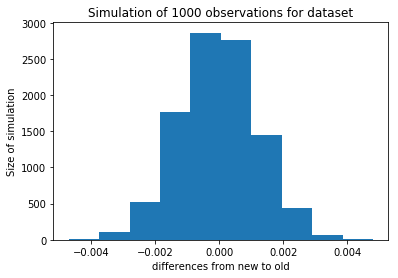

In [27]:
plt.hist(diffs)
plt.xlabel('differences from new to old')
plt.ylabel('Size of simulation')
plt.title('Simulation of 1000 observations for dataset')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# here will calculate the difference form the normal dataset:
treat_conver = df[df['group'] == 'treatment']['converted'].mean()
cont_conver = df[df['group'] == 'control']['converted'].mean()
d_diff = treat_conver - cont_conver
print("difference of dataset from treatment to control is",d_diff)

# Then here will calculated from the simulation dataset:
diffs = np.array(diffs)
print("the p-values from orignal data to simulation",(d_diff < diffs).mean())

difference of dataset from treatment to control is -0.00147959979408
the p-values from orignal data to simulation 0.887


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

- The cell above was calculating the p-values from normal dataset and simulation one.
- There is no change from new_page conversions to old one, So new page can perform as same as old_page which was the first hypothesis
H_0 : p_old >= p_new


In [29]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [30]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'treatment']['converted'].sum()
convert_new = df2[df2['group'] == 'control']['converted'].sum()
n_old = df2[df2['group'] == 'treatment']['converted'].count()
n_new = df2[df2['group'] == 'control']['converted'].count()

# To check the validation of the data we will print it:
print("convert_old = ", convert_old,"\n"
      "convert_new = ",convert_new, "\n"
     "n_old = ", n_old,"\n"
     "n_new = ", n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old =  17264 
convert_new =  17489 
n_old =  145310 
n_new =  145274


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print("z_score = ",p_value, "\n"
     "p_value = ", p_value)

# we will use norm from scipy to know how large are the value is significant
# and our value for confidence is 95%
from scipy.stats import norm
print(norm.cdf(z_score))
print(norm.cdf(p_value))

z_score =  0.094941687241 
p_value =  0.094941687241
0.094941687241
0.53781942779


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# After creating the intercept we will create the dummy values for group column:
df['intercept'] = 1
df[['treatment', 'control']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
logit_model = sm.Logit(df['converted'],df[['intercept','treatment']])
res = logit_model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Jun 2019   Pseudo R-squ.:               7.093e-06
Time:                        11:31:07   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0027      0.008   -248.781      0.000      -2.018      -1.987
treatment      0.0140      0.011      1.237      0.216      -0.008       0.036
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

So the p-value is 0.216	for treatment
- and for the hyopthese will be
- H0: P_new = P_old
- H1: Pnew != P_old

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- considering another factors to fit into the model above will change the conversion for sure,
 as examples, the dates of the year for the group teams when exactly we recieve high conversion in which months or years
 and this could be impacted from the seasonablity of the timeframe.
 
- But the disadvangtes comes that we might lose the influence or the impact if we add too much dactors to our models
 this could lead us with no insights of the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries = pd.read_csv('./countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [35]:
# We need to merge the 2 tables together to fit into the models:
df_new = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [36]:
# Now creating the dummies values as the country is category data type:
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]
df_new.head()

,country,timestamp,group,landing_page,converted,CA,US
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,0


In [37]:
# Now we will create the intercept and do as same we did before for LM model:
df['intercept'] = 1
countries_model = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
countries_res = countries_model.fit()
countries_res.summary()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 01 Jun 2019   Pseudo R-squ.:                 -0.2214
Time:                        11:31:08   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

- P values now are zeros

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0